In [38]:
from __future__ import division
import numpy
import matplotlib.pyplot as pyplot
import scipy
import scipy.constants as const
from scipy import integrate

In [47]:
#constants
m_h1 = const.m_p + const.m_e #mass of neutral hydrogen atom (kg)
sigma_0 = 6.3e-18            #cross sectional area of neutral hydrogen atom (m^2)

#variables
lambda_0 = 1216e-10          #wavelength of interest (Lyman-Alpha in this instance) (m)
temp = 10e+3                 #temperature (K)
n_dens = 1e-3                #number density of hydrogen atoms (m^3)
l_path = 1e+21               #path length (m)
n_sigma = 4                  #wavelength range plotted (dimensionless)

In [48]:
def delta_lambda(lambda_0, temp):
    return (lambda_0/const.c)*((2*const.k*temp)/m_h1)**0.5

In [49]:
def phi_lambda(wavelength, lambda_0, delta_lambda):
    return numpy.e**((-(wavelength-lambda_0)**2)/delta_lambda**2)

In [50]:
del_l = delta_lambda(lambda_0, temp)
range_low = lambda_0 - (n_sigma*del_l)
range_high = lambda_0 + (n_sigma*del_l)

In [51]:
lambdas = numpy.linspace(range_low, range_high,1000)
lambdas = numpy.array(lambdas)

In [55]:
phis = []
for i in range(len(lambdas)):
    phis.append(phi_lambda(lambdas[i], lambda_0, del_l))
phis = numpy.array(phis)

In [53]:
sig = phis * sigma_0
tau = sig * n_dens * l_path
trans = numpy.e**(-tau)
velocity = const.c*((lambdas/lambda_0)-1)/1000

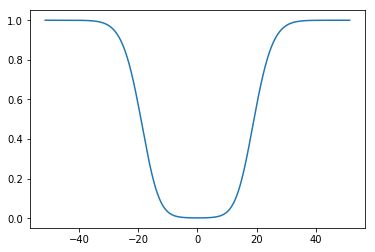

In [56]:
pyplot.figure()
pyplot.plot(velocity, trans)
pyplot.show()